In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("car_price.csv")
df

,Engine_Size,Horsepower,Age,Mileage,Brand_Rating,Price
0,3.17,228,3,79895,2.09,-586.62
1,2.11,221,10,63977,1.51,-448.13
2,2.70,264,14,7265,3.91,143.04
3,4.38,153,6,198296,1.95,-1705.44
4,1.02,299,7,123556,2.92,-1067.92
...,...,...,...,...,...,...
795,3.14,124,8,41938,4.00,-206.79
796,2.86,392,13,10102,4.18,196.73
797,4.07,110,8,173399,4.55,-1482.20
798,4.55,347,8,138746,4.66,-1008.61


In [5]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Engine_Size,Horsepower,Age,Mileage,Brand_Rating,Price
0,3.17,228,3,79895,2.09,-586.62
1,2.11,221,10,63977,1.51,-448.13
2,2.70,264,14,7265,3.91,143.04
3,4.38,153,6,198296,1.95,-1705.44
4,1.02,299,7,123556,2.92,-1067.92
...,...,...,...,...,...,...
795,3.14,124,8,41938,4.00,-206.79
796,2.86,392,13,10102,4.18,196.73
797,4.07,110,8,173399,4.55,-1482.20
798,4.55,347,8,138746,4.66,-1008.61


In [6]:
x=df.drop("Price",axis=1)
y=df["Price"]
y

0      -586.62
1      -448.13
2       143.04
3     -1705.44
4     -1067.92
        ...   
795    -206.79
796     196.73
797   -1482.20
798   -1008.61
799    -415.64
Name: Price, Length: 800, dtype: float64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [8]:
model=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [9]:
y_pred=model.predict(x_test)
y_pred

array([-1620.3216, -1251.149 , -1455.4944, -1656.9514, -1555.692 ,
        -995.0628,  -586.6142, -1267.2828,  -313.4438, -1050.698 ,
       -1038.2494, -1318.9416,  -643.1714,   -58.583 ,   193.147 ,
       -1312.9552, -1474.2124, -1314.407 , -1361.8676,  -668.5396,
       -1072.5748, -1412.789 , -1221.688 , -1532.7526, -1314.07  ,
        -189.4198, -1168.1158,    21.088 ,    27.889 , -1430.261 ,
       -1268.3754,    94.3218,  -705.52  ,  -790.5186,  -611.9092,
        -902.6676,  -645.2502,  -710.1998,   133.37  ,   -12.9788,
          81.0752,   -58.266 ,   -61.1002, -1637.0928, -1089.586 ,
        -965.154 ,  -291.7284, -1089.4618,   173.2416, -1665.0038,
         116.3402, -1613.8786, -1312.7776,  -276.6826, -1729.5336,
       -1427.6516, -1667.5582,  -943.3252, -1100.9632,  -758.8126,
        -511.6526,  -484.3766,   103.1176, -1134.5606, -1614.3046,
       -1681.1412,    16.9586,  -609.1416,   101.8166,  -866.9352,
        -618.3802, -1000.4586,  -178.8308, -1000.1244,  -888.5

In [14]:
msc=mean_squared_error(y_pred,y_test)
print(msc)
rmsc=np.sqrt(msc)
print(rmsc)

1575.081908444255
39.68730160195141


In [15]:
score=r2_score(y_pred,y_test)
score

0.9953044200941524

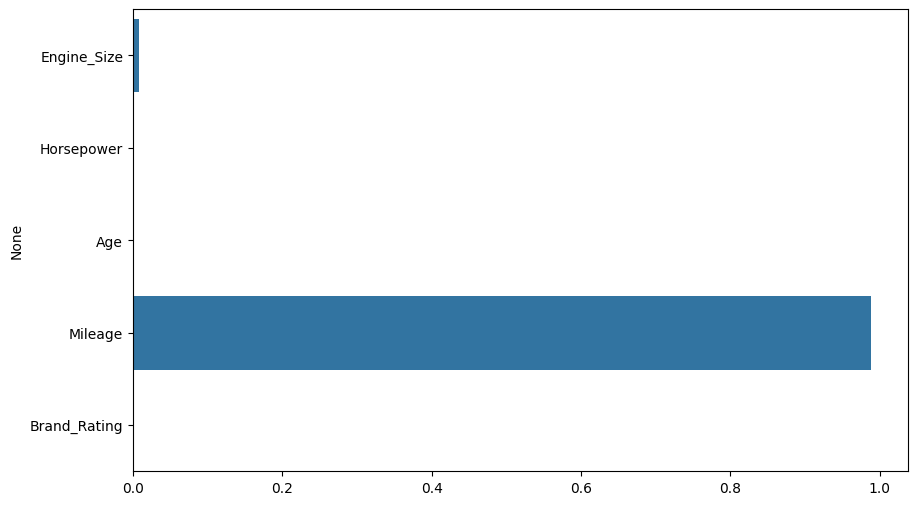

In [16]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [17]:
data=pd.DataFrame({
    "Engine_Size":[3.17],
    "Horsepower":[228],
    "Age":[3],
    "Mileage":[79895],
    "Brand_Rating":[2.09]
})
predi=model.predict(data)
predi

array([-562.7924])